<a href="https://colab.research.google.com/github/vaishnavi4445/kmeans_gene_clustering/blob/main/kmeans_gene_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

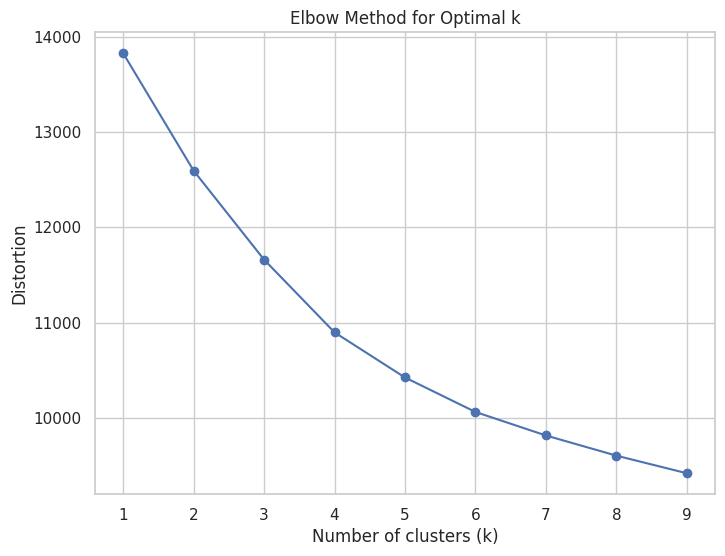

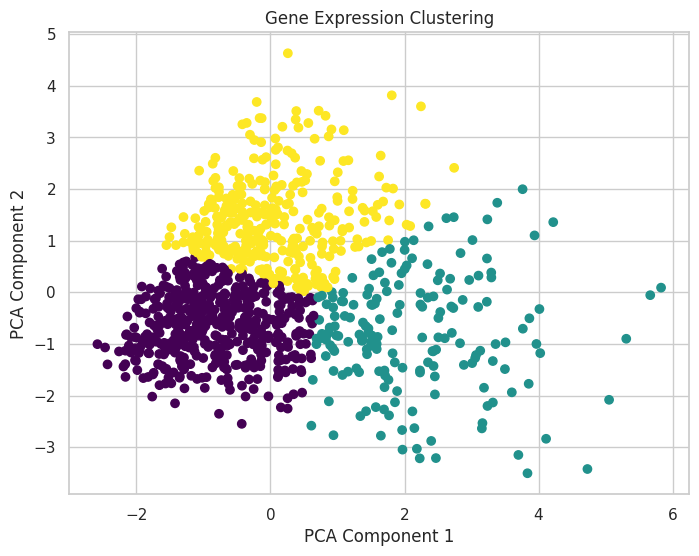

Silhouette Score: 0.092


In [2]:
# 🧬 K-Means Clustering on Gene Expression Data

# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 🎨 Style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

# 📊 Load dataset
url = "https://www.openml.org/data/get_csv/31/dataset_151_gene_expression.csv"
data = pd.read_csv(url)

# 🧹 Preprocessing
X = data.drop(columns=["class"])  # Remove label if present

# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a preprocessing and clustering pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', PCA(n_components=2)),
                           ('kmeans', KMeans(n_clusters=3, random_state=42, n_init=10))]) # Added n_init to suppress warning

# Fit the pipeline to the data
pipeline.fit(X)

# Get the transformed data for visualization
X_pca = pipeline.named_steps['pca'].transform(pipeline.named_steps['preprocessor'].transform(X))
clusters = pipeline.named_steps['kmeans'].labels_

# 🔍 Elbow Method (using the preprocessed data)
def elbow_plot(data):
    distortions = []
    K = range(1, 10)
    for k in K:
        # Use a pipeline for elbow method as well
        elbow_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('kmeans', KMeans(n_clusters=k, random_state=42, n_init=10))]) # Added n_init
        elbow_pipeline.fit(data)
        distortions.append(elbow_pipeline.named_steps['kmeans'].inertia_)
    plt.plot(K, distortions, 'bo-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal k')
    plt.show()

elbow_plot(X) # Use original data as input to the elbow pipeline

# 🎨 Visualize clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Gene Expression Clustering")
plt.show()

# 📈 Silhouette Score (using the preprocessed data)
# Transform the original data with the preprocessor before calculating silhouette score
X_scaled_encoded = pipeline.named_steps['preprocessor'].transform(X)
score = silhouette_score(X_scaled_encoded, clusters)
print(f"Silhouette Score: {score:.3f}")